In [1]:
import numpy as np
from matplotlib import pyplot as plt
from fcnn import fcnn

In [2]:
def train_test_split(data):
    n_samples = data.shape[0]
    training_ratio = 0.6
    validation_ratio = 0.2
    # testing_ratio = 0.2
    train_sample_size = np.int_(n_samples*training_ratio)
    validation_sample_size = np.int_(n_samples*validation_ratio)
    # print(train_sample_size, validation_sample_size)
    np.random.shuffle(data)
    #return training_samples, test_samples
    return data[:train_sample_size, :], data[train_sample_size:train_sample_size+validation_sample_size, :], data[train_sample_size+validation_sample_size:, :]

# Non-linearly seperable data for classification

### Importing data

In [3]:
file_data = '/Users/raunavghosh/Documents/DeepLearning/Assignments/ProgrammingAssignment2/Group10/Classification/NLS_Group10.txt'

In [4]:
data = np.loadtxt(file_data, skiprows=1)

In [5]:
class1_data = data[:500, :]
class2_data = data[500:1000, :]
class3_data = data[1000:, :]
class1_data.shape, class2_data.shape, class3_data.shape

((500, 2), (500, 2), (500, 2))

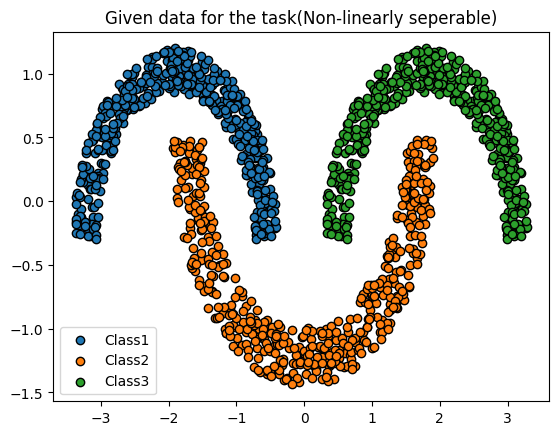

In [6]:
plt.figure()
plt.scatter(class1_data[:, 0], class1_data[:, 1], edgecolors='black')
plt.scatter(class2_data[:, 0], class2_data[:, 1], edgecolors='black')
plt.scatter(class3_data[:, 0], class3_data[:, 1], edgecolors='black')
plt.legend(['Class1', 'Class2', 'Class3'])
plt.title('Given data for the task(Non-linearly seperable)')
plt.show()

### Spliting data

In [7]:
class1_train, class1_valid, class1_test = train_test_split(class1_data)
class2_train, class2_valid, class2_test = train_test_split(class2_data)
class3_train, class3_valid, class3_test = train_test_split(class3_data)

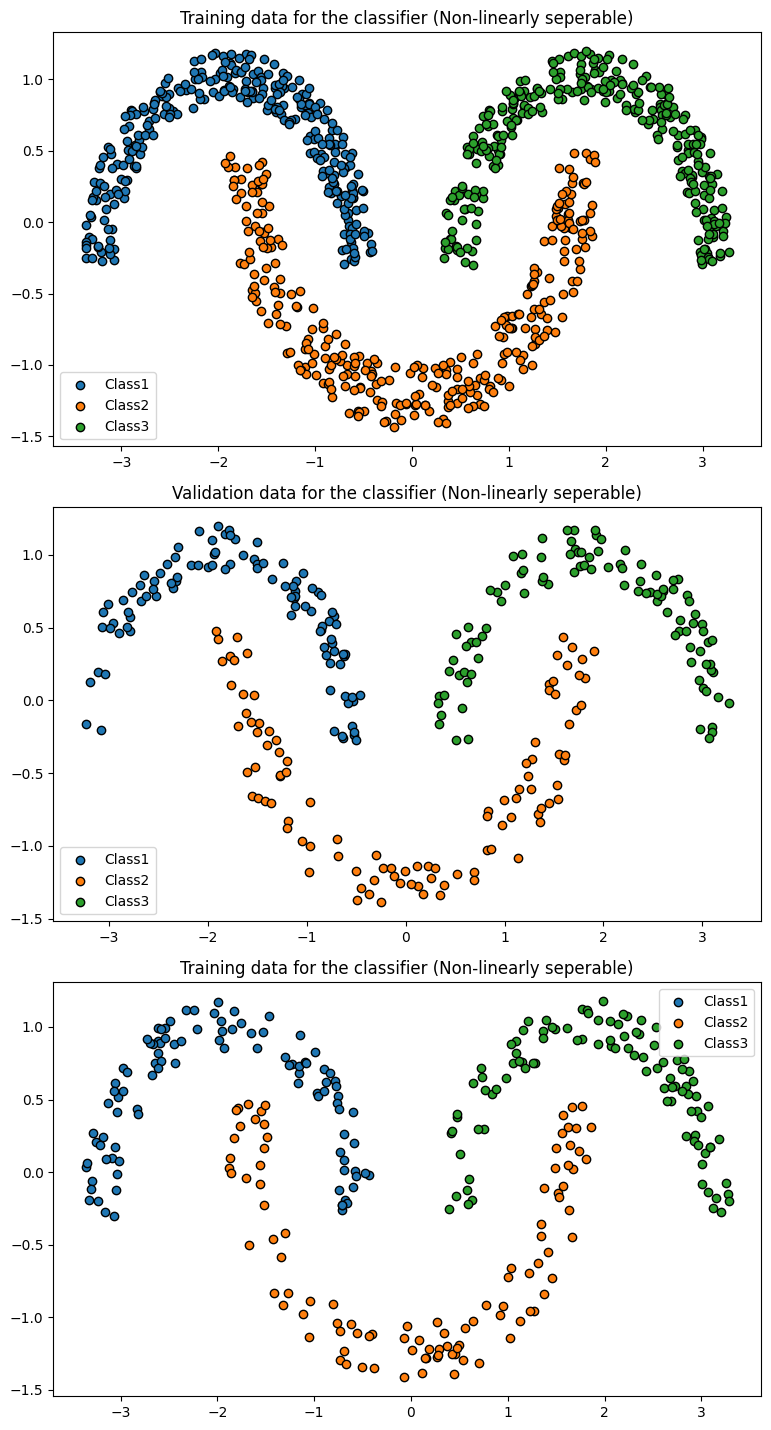

In [8]:
plt.figure()
plt.subplot(3,1,1)
plt.scatter(class1_train[:, 0], class1_train[:, 1], edgecolors='black')
plt.scatter(class2_train[:, 0], class2_train[:, 1], edgecolors='black')
plt.scatter(class3_train[:, 0], class3_train[:, 1], edgecolors='black')
plt.legend(['Class1', 'Class2', 'Class3'])
plt.title('Training data for the classifier (Non-linearly seperable)')

plt.subplot(3,1,2)
plt.scatter(class1_valid[:, 0], class1_valid[:, 1], edgecolors='black')
plt.scatter(class2_valid[:, 0], class2_valid[:, 1], edgecolors='black')
plt.scatter(class3_valid[:, 0], class3_valid[:, 1], edgecolors='black')
plt.legend(['Class1', 'Class2', 'Class3'])
plt.title('Validation data for the classifier (Non-linearly seperable)')

plt.subplot(3,1,3)
plt.scatter(class1_test[:, 0], class1_test[:, 1], edgecolors='black')
plt.scatter(class2_test[:, 0], class2_test[:, 1], edgecolors='black')
plt.scatter(class3_test[:, 0], class3_test[:, 1], edgecolors='black')
plt.legend(['Class1', 'Class2', 'Class3'])
plt.title('Training data for the classifier (Non-linearly seperable)')
plt.tight_layout(rect=[0, 0, 1.2, 3])
plt.show()

### Building cassifier

In [9]:
seed = 1342869
# seed = np.random.randint(10000000)
# seed

In [11]:
np.random.seed(seed)
max_epoch = 500
neta = 0.1
classifier = fcnn(node_layers=[2, 7, 3], max_epoch=max_epoch, learning_rate=neta)
err_epoch = classifier.fit_classifier(class1_train, class2_train, class3_train)

Text(0, 0.5, 'Error')

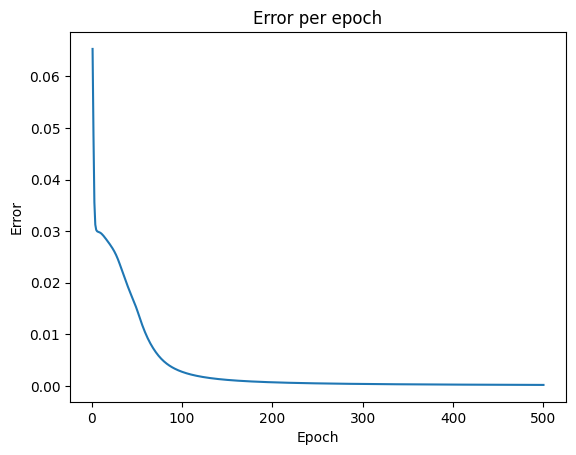

In [12]:
plt.title("Error per epoch")
plt.plot(range(1, len(err_epoch)+1), err_epoch)
plt.xlabel("Epoch")
plt.ylabel("Error")


In [13]:
# generating points in the region
x_arr = np.linspace(-4, 4, 500)
y_arr = np.linspace(-1.6, 1.5, 500)
xx, yy = np.meshgrid(x_arr, y_arr)
region = np.concatenate((xx.reshape((-1,1)), yy.reshape((-1,1))), axis=1)


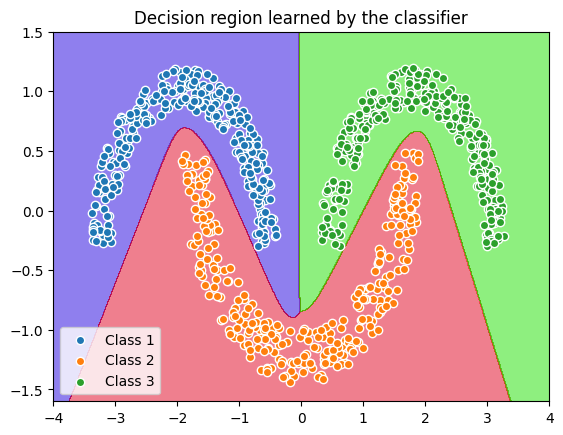

In [14]:
pred_region = []
for point in region:
    pred_region.append(classifier.predict(point))
region.shape, len(pred_region)
pred_region = np.reshape(pred_region, xx.shape)
plt.figure()
plt.contourf(xx, yy, pred_region, alpha = 0.5, cmap='brg')
# plt.colorbar()

plt.scatter(class1_train[:, 0], class1_train[:, 1], label='Class 1', edgecolors='white')
plt.scatter(class2_train[:, 0], class2_train[:, 1], label='Class 2', edgecolors='white')
plt.scatter(class3_train[:, 0], class3_train[:, 1], label='Class 3', edgecolors='white')
plt.legend()
plt.title('Decision region learned by the classifier')

plt.show()

# Testing phase

In [15]:
all_test = np.concatenate((class1_test, class2_test, class3_test), axis=0)
all_true_labels = np.concatenate((np.full(shape=class1_test.shape[0], fill_value=1),
                                np.full(shape=class2_test.shape[0], fill_value=2),
                                np.full(shape=class3_test.shape[0], fill_value=3),), axis=0)    
all_test.shape, all_true_labels.shape

((300, 2), (300,))

In [16]:
all_pred_labels = []
for sample in all_test:
    all_pred_labels.append(classifier.predict(sample=sample))

In [17]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score
print(f'Confusion matrix:\n{confusion_matrix(all_true_labels, all_pred_labels)}')
print(f'Acccuracy: {accuracy_score(all_true_labels, all_pred_labels)}')
print(f'Recall: {recall_score(all_true_labels, all_pred_labels, labels=(1, 2, 3), average="micro")}')
print(f'f1-score: {f1_score(all_true_labels, all_pred_labels, labels=(1, 2, 3), average="micro")}')

Confusion matrix:
[[100   0   0]
 [  0 100   0]
 [  0   0 100]]
Acccuracy: 1.0
Recall: 1.0
f1-score: 1.0
